In [ ]:
!nvidia-smi

Mon Oct 16 16:11:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

## Importing Libraries

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/78.2 GB disk)


## YOLO V8 ON CUSTOM DATASET OF BOTTLES


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="C4pHQj9DsJmYjHwOLRr3")
project = rf.workspace("care-s177g").project("nivea-dataset")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Nivea-Dataset-1 in yolov8:: 100%|██████████| 292/292 [00:00<00:00, 5328.49it/s]


In [ ]:
!yolo task = detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz = 640

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Nivea-Dataset-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

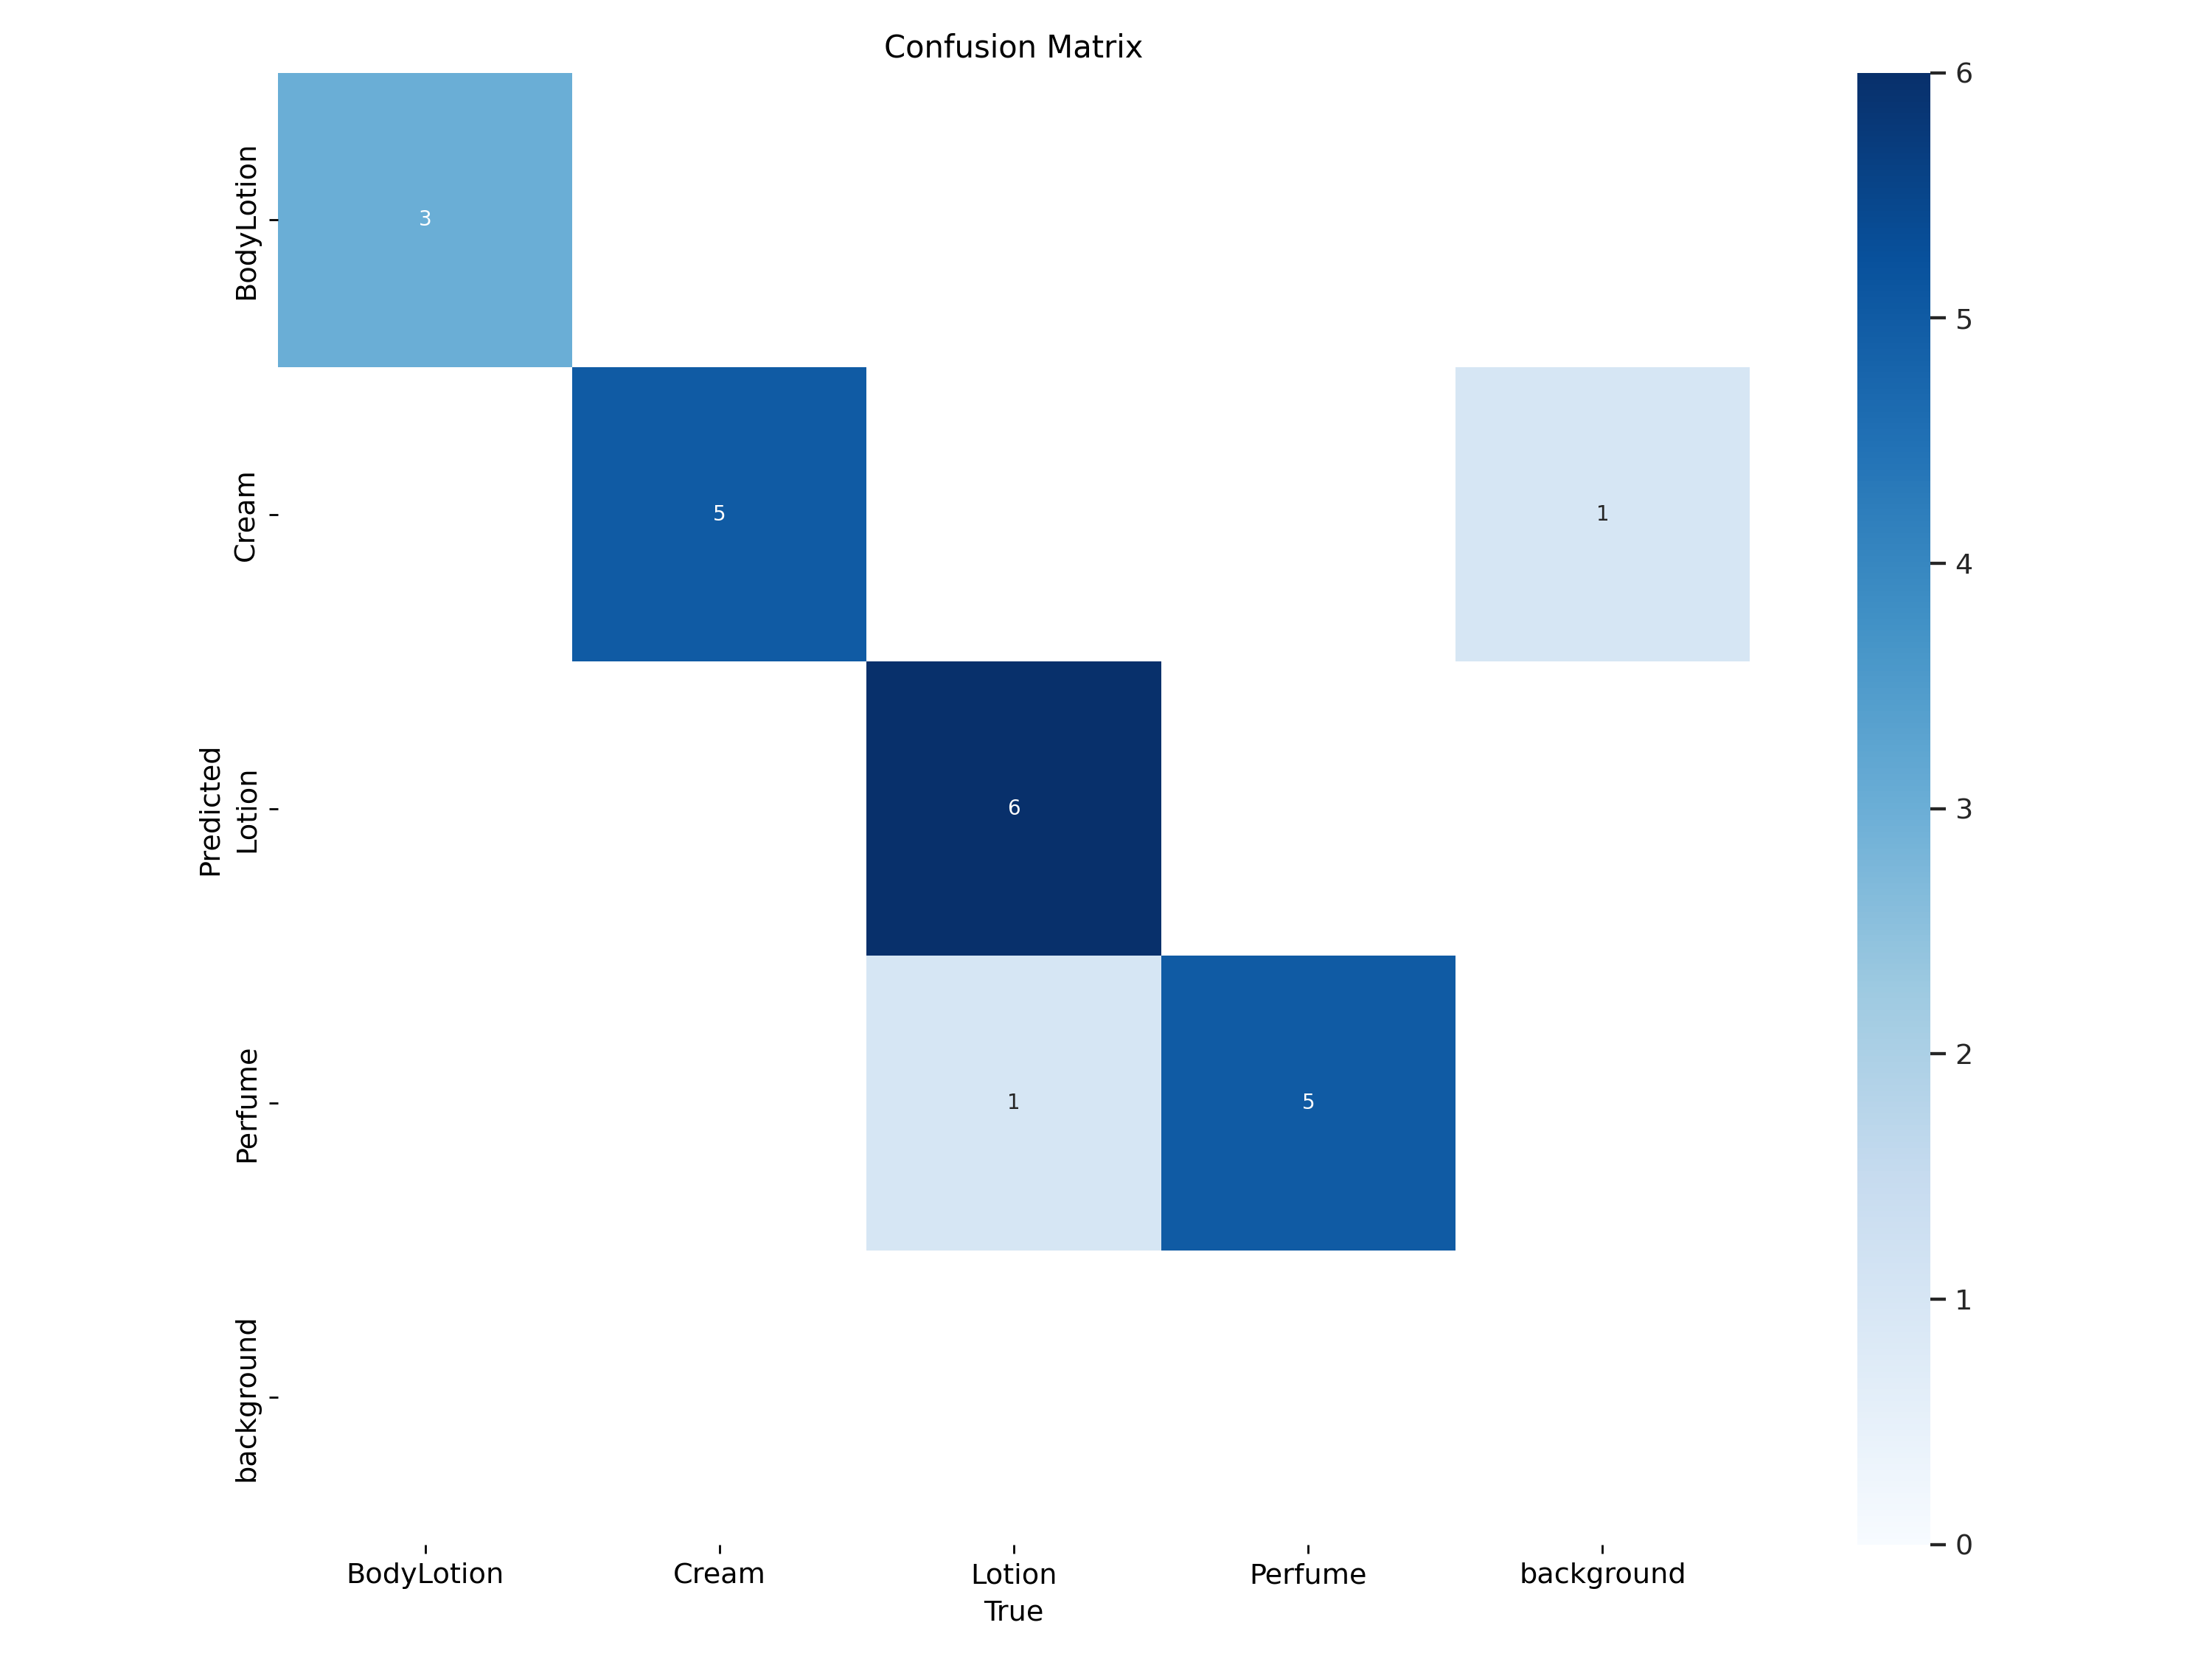

In [ ]:
Image(filename=f"/content/runs/detect/train2/confusion_matrix.png", width = 600)

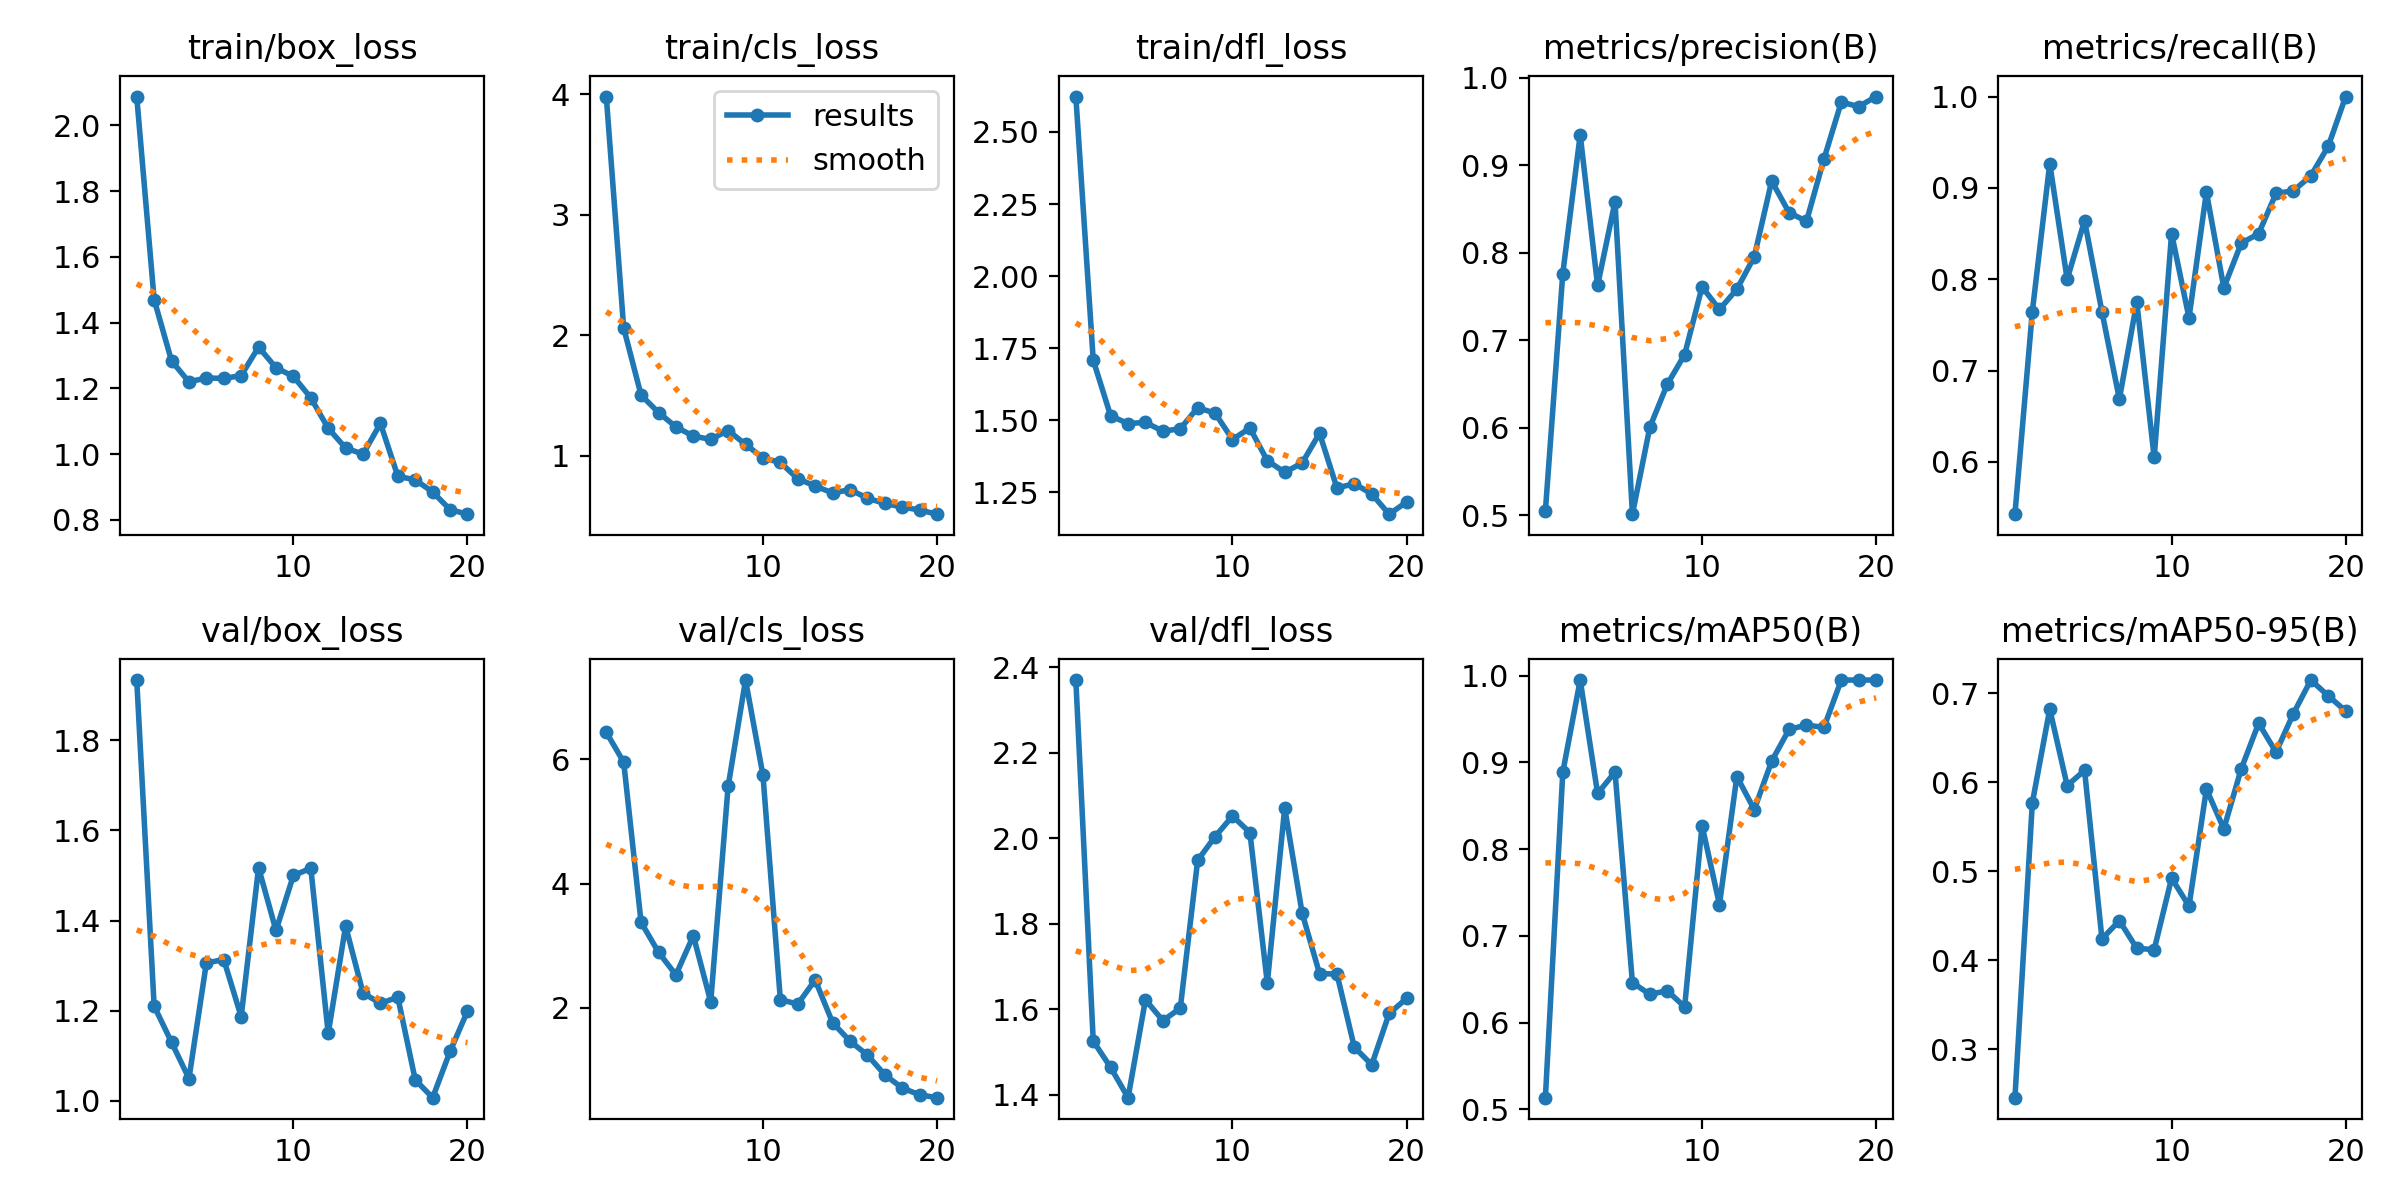

In [ ]:
Image(filename=f"/content/runs/detect/train2/results.png", width=600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo task=detect mode=val model = /content/runs/detect/train2/weights/best.pt data = {dataset.location}/data.yaml

WARNING ⚠️ /content/runs/detect/train2/weights/best.pt appears to require 'ultralytics.utils', which is not in ultralytics requirements.
AutoInstall will run now for 'ultralytics.utils' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['ultralytics.utils'] not found, attempting AutoUpdate...
ERROR: Could not find a version that satisfies the requirement ultralytics.utils (from versions: none)
ERROR: No matching distribution found for ultralytics.utils
requirements: ❌ Command 'pip install --no-cache "ultralytics.utils"  ' returned non-zero exit status 1.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 518, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/d

In [ ]:
!yolo task=detect mode=predict model = /content/runs/detect/train2/weights/best.pt conf=0.5 source = {dataset.location}/test/images

WARNING ⚠️ /content/runs/detect/train2/weights/best.pt appears to require 'ultralytics.utils', which is not in ultralytics requirements.
AutoInstall will run now for 'ultralytics.utils' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['ultralytics.utils'] not found, attempting AutoUpdate...
ERROR: Could not find a version that satisfies the requirement ultralytics.utils (from versions: none)
ERROR: No matching distribution found for ultralytics.utils
requirements: ❌ Command 'pip install --no-cache "ultralytics.utils"  ' returned non-zero exit status 1.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 518, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/d

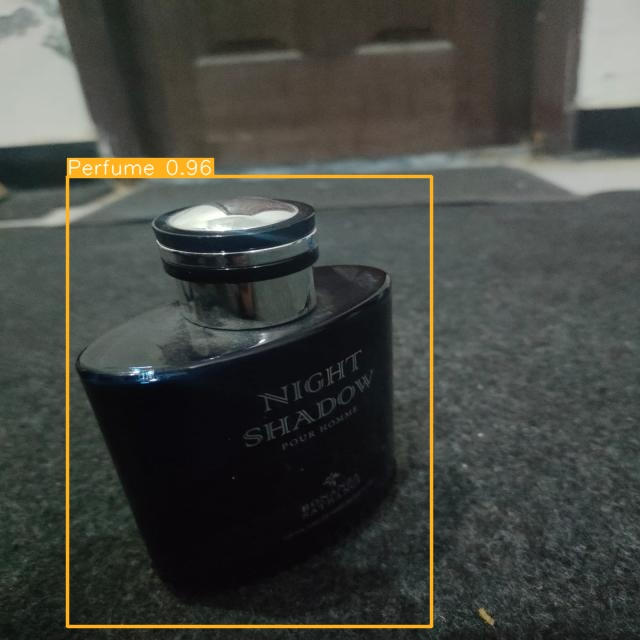

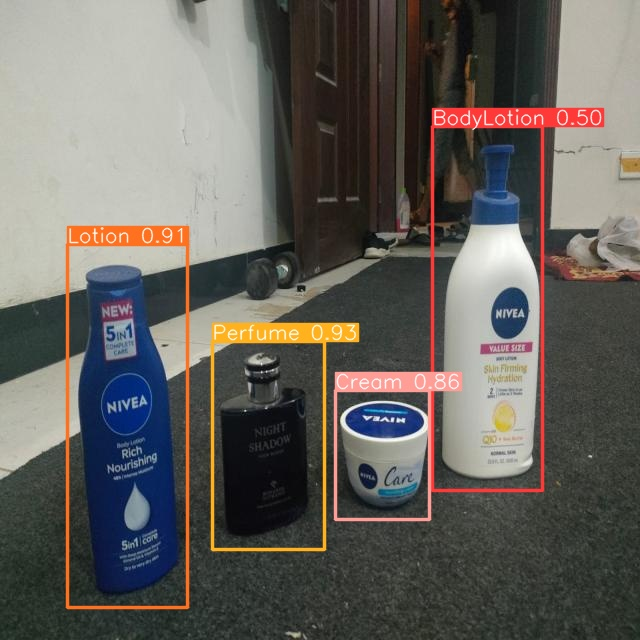

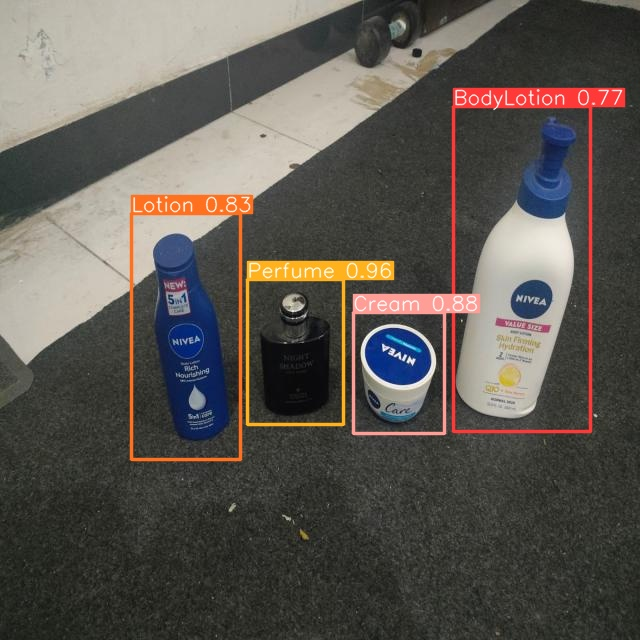

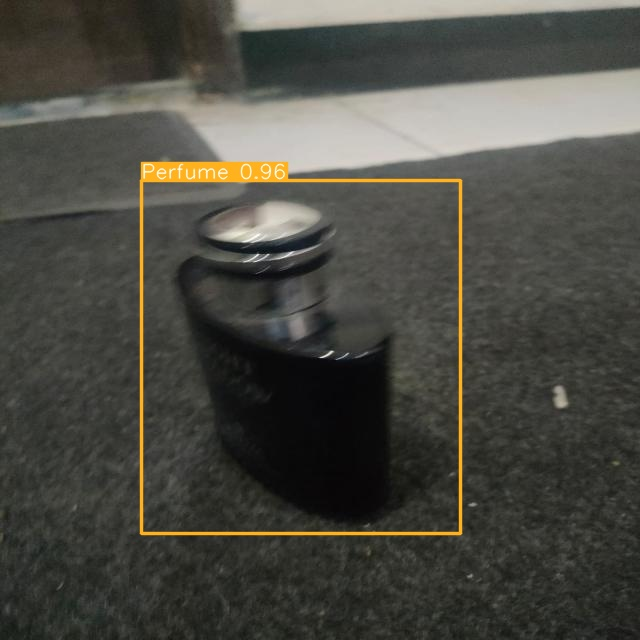

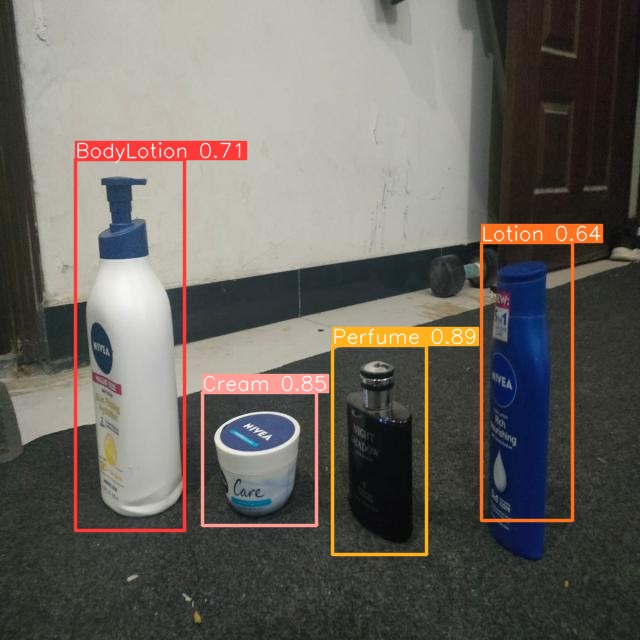

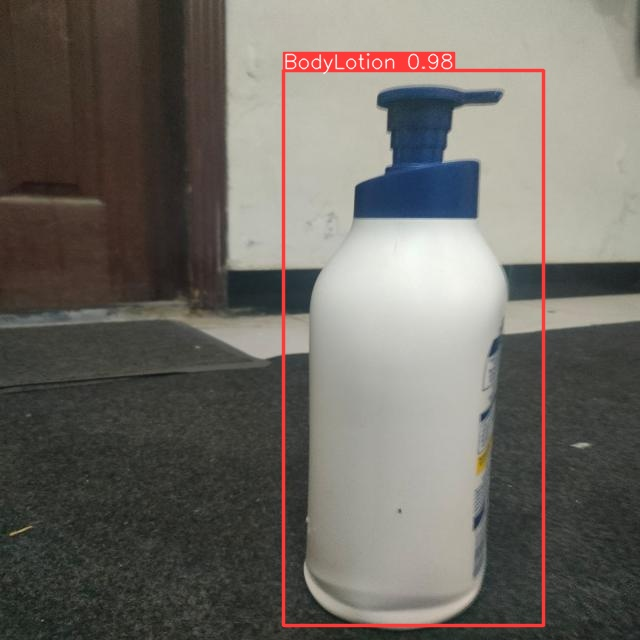

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print()

# DEPLOY


In [ ]:
!pip install ultralytics==8.0.134

In [ ]:
project.version(dataset.version).deploy(model_type='yolov8', model_path= f'/content/runs/detect/train2')